In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Datos de concentración por día
datos = {
    "Lunes":     [420, 390, 480, 430, 440, 324, 450, 460],
    "Martes":    [450, 390, 430, 521, 320, 360, 342, 423],
    "Miércoles": [355, 462, 286, 238, 344, 423, 123, 196],
    "Jueves":    [321, 254, 412, 368, 340, 258, 433, 489],
    "Viernes":   [238, 255, 366, 389, 198, 256, 248, 324]
}

# Convertimos a DataFrame largo (formato tidy)
df = pd.DataFrame(datos)
df_melted = df.melt(var_name="Día", value_name="CO")

# Vista previa del formato largo
df_melted.head()


,Día,CO
0,Lunes,420
1,Lunes,390
2,Lunes,480
3,Lunes,430
4,Lunes,440


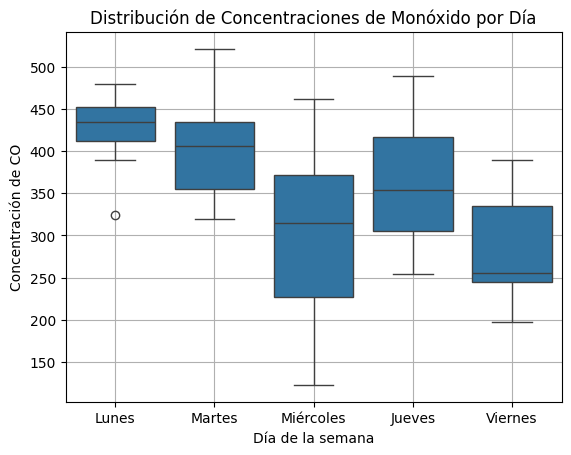

In [2]:
sns.boxplot(x="Día", y="CO", data=df_melted)
plt.title("Distribución de Concentraciones de Monóxido por Día")
plt.ylabel("Concentración de CO")
plt.xlabel("Día de la semana")
plt.grid(True)
plt.show()


In [3]:
modelo = ols('CO ~ C(Día)', data=df_melted).fit()
anova_resultado = sm.stats.anova_lm(modelo, typ=2)
print(anova_resultado)


             sum_sq    df         F    PR(>F)
C(Día)    119484.35   4.0  4.775036  0.003518
Residual  218948.75  35.0       NaN       NaN


**Punto A**
Se puede concluir que dado el valor-p del analisis de la varianza 0.0035 < 0.05 la hipotesis nula al 5% de significncia. 
Por lo tanto , existe evidencia para afirmar que las concentraciones de monoxido  **NO SON IGUALES** en todos los dias analizados 

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj    lower    upper   reject
-------------------------------------------------------------
   Jueves     Lunes   64.875 0.4826  -48.8234 178.5734  False
   Jueves    Martes   45.125 0.7838  -68.5734 158.8234  False
   Jueves Miércoles    -56.0 0.6217 -169.6984  57.6984  False
   Jueves   Viernes  -75.125 0.3364 -188.8234  38.5734  False
    Lunes    Martes   -19.75 0.9869 -133.4484  93.9484  False
    Lunes Miércoles -120.875 0.0325 -234.5734  -7.1766   True
    Lunes   Viernes   -140.0 0.0095 -253.6984 -26.3016   True
   Martes Miércoles -101.125  0.101 -214.8234  12.5734  False
   Martes   Viernes  -120.25 0.0338 -233.9484  -6.5516   True
Miércoles   Viernes  -19.125 0.9884 -132.8234  94.5734  False
-------------------------------------------------------------


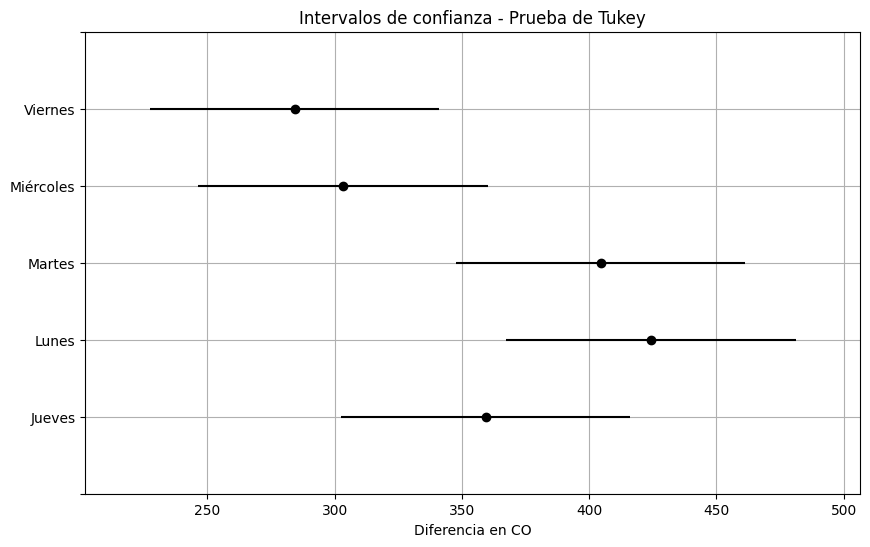

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Aplicar prueba de Tukey HSD usando el dataframe correcto
tukey = pairwise_tukeyhsd(endog=df_melted['CO'], groups=df_melted['Día'], alpha=0.05)

# Mostrar resultados
print(tukey)

# Opcional: visualizar
tukey.plot_simultaneous()
plt.title("Intervalos de confianza - Prueba de Tukey")
plt.xlabel("Diferencia en CO")
plt.grid(True)
plt.show()


**PUNTO B**
Despues de ejecutar y analizar la prueba de Turjey se puede concluir qeu no todos los dias presentan diferencias significativas, pero hay 3 comparativas, que tienen una gran significiancia 
por ejemplo los dias lunes y martes tienen concentraciones mas altas de **CO**, que miercoles y viernes, por lo tanto se puede sacar la hipotesis que la contaminacion del aire tiende a disminuir hacia el final de la semana
